In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
Data_set = pd.read_csv(r'C:\Users\3bdel\PycharmProjects\Data_wrangling_project\.venv\Scripts\mobile_usage_behavioral_analysis.csv')
Data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.3+ KB


In [43]:
Data_set.describe()

,User_ID,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,38.745000,6.405670,7.696310,16.64700,2.456330,2.495270,2.475410
std,288.819436,12.186734,3.134855,3.714187,7.61961,1.439525,1.443392,1.450362
min,1.000000,18.000000,1.000000,1.010000,3.00000,0.000000,0.000000,0.010000
25%,250.750000,28.000000,3.590000,4.530000,10.00000,1.200000,1.282500,1.220000
50%,500.500000,40.000000,6.455000,7.880000,17.00000,2.445000,2.435000,2.455000
75%,750.250000,50.000000,9.122500,10.910000,23.00000,3.672500,3.710000,3.782500
max,1000.000000,59.000000,11.970000,14.000000,29.00000,4.990000,5.000000,5.000000


In [44]:
Data_set.isnull().sum()

User_ID                         0
Age                             0
Gender                          0
Total_App_Usage_Hours           0
Daily_Screen_Time_Hours         0
Number_of_Apps_Used             0
Social_Media_Usage_Hours        0
Productivity_App_Usage_Hours    0
Gaming_App_Usage_Hours          0
Location                        0
dtype: int64

In [45]:
Data_set.duplicated().sum() # The output below means there are no duplicate rows

np.int64(0)

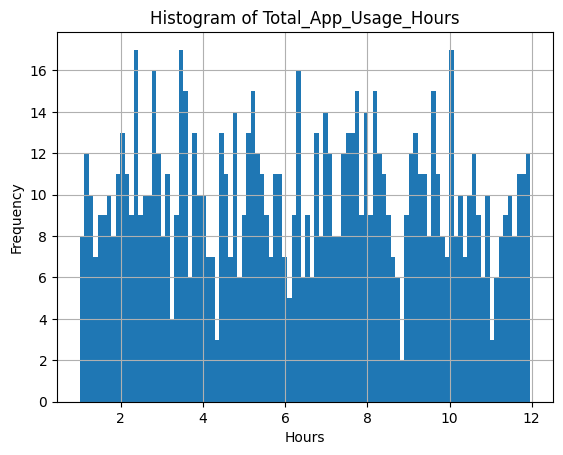

In [54]:
Data_set['Total_App_Usage_Hours'].hist(bins=100)  # You can change the number of bins
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Histogram of Total_App_Usage_Hours')
plt.show()

In [80]:
#to identify outliers we repeat the following steps for every column
#Total_app_usage_hours

columns_to_check = ['Total_App_Usage_Hours', 'Daily_Screen_Time_Hours','Number_of_Apps_Used', 'Social_Media_Usage_Hours','Productivity_App_Usage_Hours','Gaming_App_Usage_Hours']

def flag_outliers_iqr(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (column_data < lower) | (column_data > upper)

for col in columns_to_check:
    Data_set[f'{col}_outlier'] = flag_outliers_iqr(Data_set[col])

Data_set

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,Total_App_Usage_Hours_outlier,Daily_Screen_Time_Hours_outlier,Number_of_Apps_Used_outlier,Social_Media_Usage_Hours_outlier,Productivity_App_Usage_Hours_outlier,Gaming_App_Usage_Hours_outlier
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,False,False,False,False,False,False
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,False,False,False,False,False,False
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,False,False,False,False,False,False
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,False,False,False,False,False,False
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles,False,False,False,False,False,False
996,997,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles,False,False,False,False,False,False
997,998,46,Female,11.68,10.06,9,2.35,3.13,1.03,Phoenix,False,False,False,False,False,False
998,999,25,Male,3.89,10.78,15,4.00,1.79,1.61,Phoenix,False,False,False,False,False,False


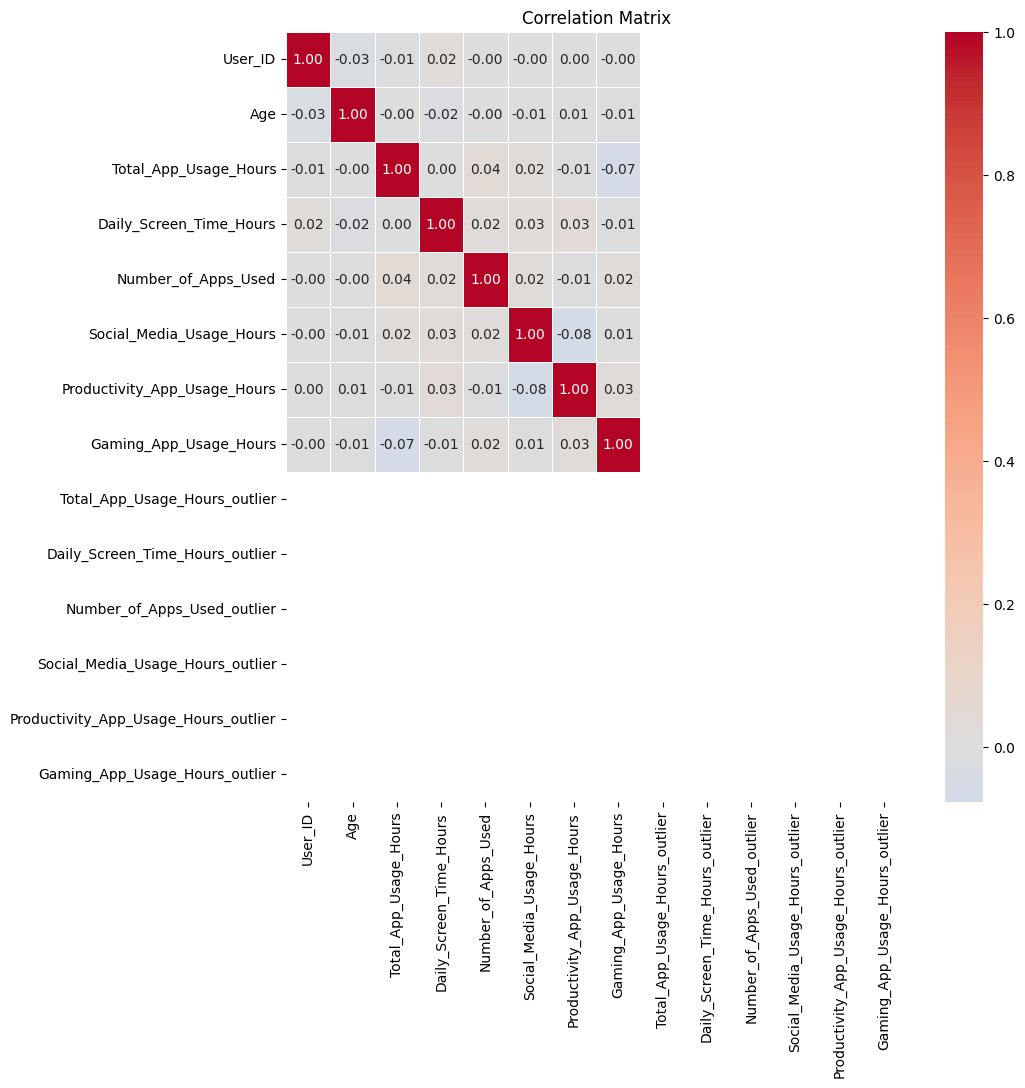

In [78]:
#Correlation Matrix to check how strongly if variables are related
corr = Data_set.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()